# K-Nearest Neighbors code
This notebook aims to develop one of the simplest machine learning algorithms, K-Nearest Neighbors (KNN). 
I will use the Euclidean distance to implement the algorithm, and as a measure of success, I will compare its accuracy with the algorithm from the Scikit-learn library. I will also plot the decision boundary and compare it with the decision boundary generated by the Yellowbrick library.

1. [Libraries](#1)
2. [Creating some data](#2)
3. [Split the data in train and test](#3)
4. [Accuracy score](#4)
5. [Scikitlearn KNN accuracy](#5)
6. [Decision boundaries](#6)
7. [Creating knn algorithm](#7)
8. [Decision boundary algorithm](#8)
9. [Accuracy comparison](#9)
10. [Decision boundary comparison](#10)

<a id="1"></a>
## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import  make_blobs
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.contrib.classifier import DecisionViz
from sklearn.metrics import accuracy_score

<a id="2"></a>
## Creating some data.
For this example, let's use 2 features and 3 different classes. 

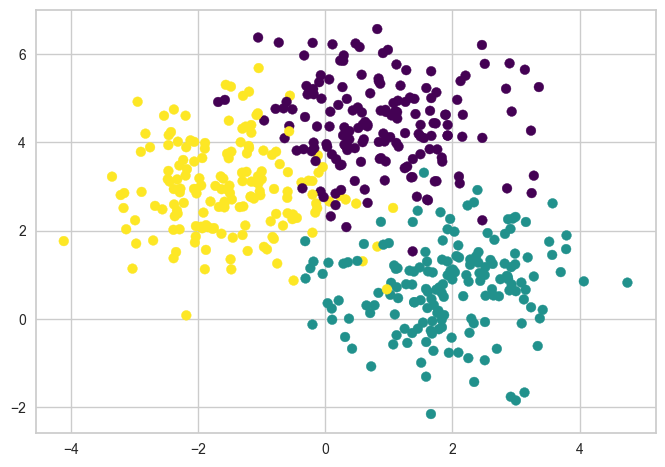

In [2]:
# X defines the features, while the y defines the point class (color).
X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=0)

# Turn the numpy array generated into a dataframe.
df = pd.DataFrame(
    {
        'feature-1': X[:, 0],
        'feature-2': X[:, 1],
        'class': y
    }
)

cmap = plt.cm.viridis
plt.scatter(df['feature-1'], df['feature-2'], c=df['class'],cmap=cmap)
plt.grid(True)
plt.show()

<a id="3"></a>
## Split the data in train and test

In [3]:
# Train data is set as 70% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<a id="4"></a>
## Accuracy score
Accuracy is one of the metrics used to evaluate the performance of a classification model. It is defined as the ratio of correct predictions to the total number of predictions made. 
$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

<a id="5"></a>
## Scikitlearn KNN accuracy

In [4]:
# Creating a K-Nearest Neighbors (KNN) classifier with 5 neighbors and Euclidean metric
clf = KNeighborsClassifier(
    n_neighbors=5,
    metric="euclidean"
    )

# Training the classifier with the training data
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Calculating the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'The scikit-lean accuracy is: {accuracy}')

The scikit-lean accuracy is: 0.9266666666666666


<a id="6"></a>
## Decision boundaries
A decision boundary in the context of a K-Nearest Neighbors (KNN) algorithm is a boundary that separates different classes in the feature space. It defines the regions where the classification decision changes from one class to another.

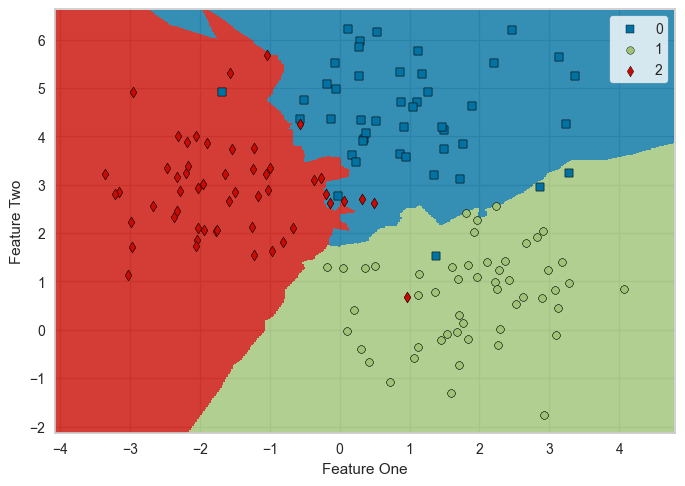

<Axes: xlabel='Feature One', ylabel='Feature Two'>

In [5]:
# Creating a DecisionViz visualization object for the classifier
viz = DecisionViz(clf)                  

# Fitting the visualization with the training data
viz.fit(X_train, y_train)

# Drawing the decision boundaries using the test data
viz.draw(X_test, y_test)

# Displaying the visualization
viz.show()

<a id="7"></a>
## Creating knn algorithm

In [6]:
result = []  # Initialize an empty list to store the predicted class for each test point
k = 5
train_features = X_train
test = X_test

for test_point in test:  # Iterate over each point in the test dataset
    # Calculate the Euclidean distance by summing the squared differences across all features and taking the square root
    a = ((train_features - test_point)**2)
    
    # Sum the squared differences across all features to get the squared Euclidean distance
    a1 = np.sqrt(np.sum(a, axis=1))
    
    # Flatten the result and reshape it into a column vector
    a1 = a1.flatten().reshape(a1.shape[0], 1)
    
    # Flatten the training labels and reshape them into a column vector
    a2 = y_train.flatten().reshape(a1.shape[0], 1)
    
    # Horizontally stack the labels and their corresponding distances into a single array
    horz_stack_2 = np.hstack((a2, a1))
    
    # Convert the array to a DataFrame and sort by the distance (second column, index 1)
    df = pd.DataFrame(horz_stack_2)
    df = df.sort_values(by=[1]).iloc[0:k, :]  # Select the k nearest neighbors (smallest distances)
    
    # Convert the DataFrame back to a NumPy array
    nearest = np.array(df)
    
    # Find the unique labels among the nearest neighbors and count their occurrences
    unique, counts = np.unique(nearest, return_counts=True)
    
    # Select the label with the highest count (the most frequent class)
    c = unique[np.argmax(counts)]
    
    # Append the predicted class to the result list
    result.append(c)

# Convert the list of predictions to a NumPy array
y_pred_2 = np.array(result)

# Calculate the accuracy of the predictions compared to the true labels
diy_accuracy = accuracy_score(y_test, y_pred_2)

# Print the accuracy score
print(f'DIY KNN accuracy: {diy_accuracy}')
    
    

DIY KNN accuracy: 0.9266666666666666


<a id="8"></a>
## Decision boundary algorithm
A simple way to create a decision boundary algorithm is to generate a grid of points and classify all of them. Once the classifications are determined, you can create contour lines with Matplotlib using the contour function.

### Grid creation

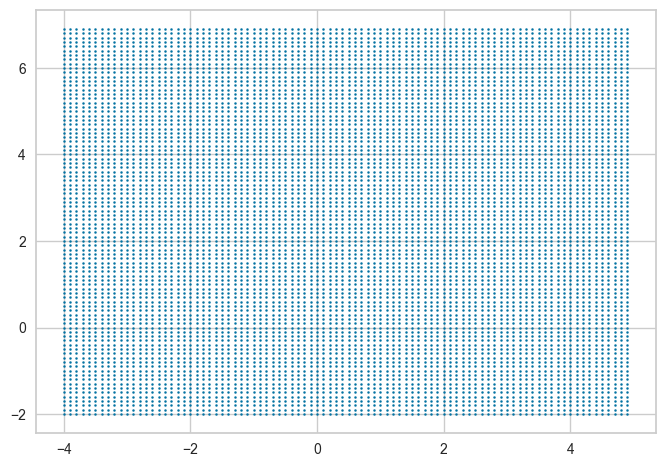

In [7]:
p = 0.1
df = pd.DataFrame(X_train)

x_min, x_max = int(np.ceil(df[0].min())) , int(np.ceil(df[0].max()))
y_min, y_max = int(np.ceil(df[1].min())), int(np.ceil(df[1].max()))

xx, yy = np.meshgrid(np.arange(x_min, x_max, p),
                     np.arange(y_min, y_max, p))
xx_shape = xx.shape

yy_ = yy.flatten()
yy_ = yy.reshape(-1,1)

xx_ = xx.flatten()
xx_ = xx.reshape(-1,1)

horz_stack = np.hstack((xx_, yy_))

df = pd.DataFrame(horz_stack)
cmap = plt.cm.viridis
plt.scatter(df[0], df[1],s=2)

### Classification of each point

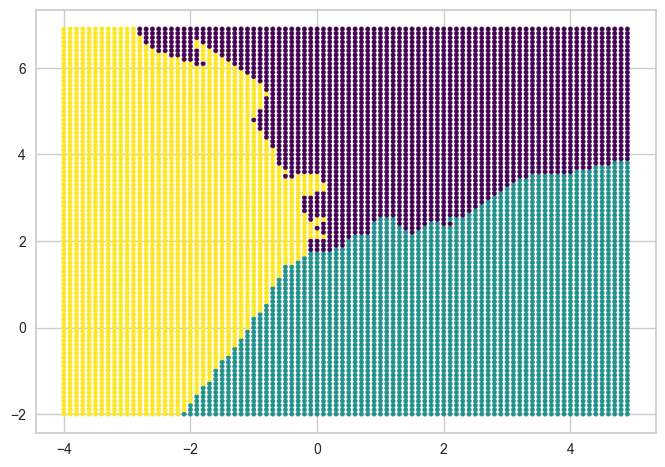

In [8]:
result = []  # Initialize an empty list to store the predicted class for each test point
k = 5
train_features = X_train.copy()
test = horz_stack.copy()

for test_point in test:  # Iterate over each point in the test dataset
    # Calculate the Euclidean distance by summing the squared differences across all features and taking the square root
    a = ((train_features - test_point)**2)
    
    # Sum the squared differences across all features to get the squared Euclidean distance
    a1 = np.sqrt(np.sum(a, axis=1))
    
    # Flatten the result and reshape it into a column vector
    a1 = a1.flatten().reshape(a1.shape[0], 1)
    
    # Flatten the training labels and reshape them into a column vector
    a2 = y_train.flatten().reshape(a1.shape[0], 1)
    
    # Horizontally stack the labels and their corresponding distances into a single array
    horz_stack_2 = np.hstack((a2, a1))
    
    # Convert the array to a DataFrame and sort by the distance (second column, index 1)
    df = pd.DataFrame(horz_stack_2)
    df = df.sort_values(by=[1]).iloc[0:k, :]  # Select the k nearest neighbors (smallest distances)
    
    # Convert the DataFrame back to a NumPy array
    nearest = np.array(df)
    
    # Find the unique labels among the nearest neighbors and count their occurrences
    unique, counts = np.unique(nearest, return_counts=True)
    
    # Select the label with the highest count (the most frequent class)
    c = unique[np.argmax(counts)]
    
    # Append the predicted class to the result list
    result.append(c)

# Convert the list of predictions to a NumPy array
y_pred_2 = np.array(result)

Z = y_pred_2
Z = Z.reshape(xx_shape)

df3 = pd.DataFrame(horz_stack)
df3['class'] = y_pred_2
cmap = plt.cm.viridis
plt.scatter(df3[0], df3[1], c=df3['class'],cmap=cmap,s=10)
plt.show()

### Improve precision
let's just put a higher number of points to classify on the grid

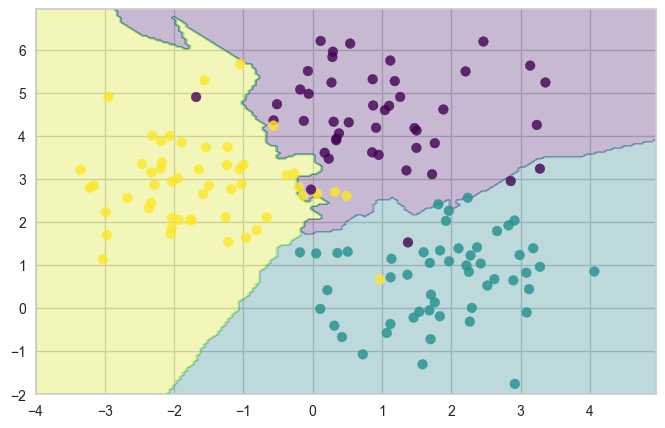

In [9]:
p = 0.05
df = pd.DataFrame(X_train)

x_min, x_max = int(np.ceil(df[0].min())) , int(np.ceil(df[0].max()))
y_min, y_max = int(np.ceil(df[1].min())), int(np.ceil(df[1].max()))

xx, yy = np.meshgrid(np.arange(x_min, x_max, p),
                     np.arange(y_min, y_max, p))
xx_shape = xx.shape

yy_ = yy.flatten()
yy_ = yy.reshape(-1,1)

xx_ = xx.flatten()
xx_ = xx.reshape(-1,1)

horz_stack = np.hstack((xx_, yy_))

df = pd.DataFrame(horz_stack)


result = []  # Initialize an empty list to store the predicted class for each test point
k = 5
train_features = X_train.copy()
test = horz_stack.copy()

for test_point in test:  # Iterate over each point in the test dataset
    # Calculate the Euclidean distance by summing the squared differences across all features and taking the square root
    a = ((train_features - test_point)**2)
    
    # Sum the squared differences across all features to get the squared Euclidean distance
    a1 = np.sqrt(np.sum(a, axis=1))
    
    # Flatten the result and reshape it into a column vector
    a1 = a1.flatten().reshape(a1.shape[0], 1)
    
    # Flatten the training labels and reshape them into a column vector
    a2 = y_train.flatten().reshape(a1.shape[0], 1)
    
    # Horizontally stack the labels and their corresponding distances into a single array
    horz_stack_2 = np.hstack((a2, a1))
    
    # Convert the array to a DataFrame and sort by the distance (second column, index 1)
    df = pd.DataFrame(horz_stack_2)
    df = df.sort_values(by=[1]).iloc[0:k, :]  # Select the k nearest neighbors (smallest distances)
    
    # Convert the DataFrame back to a NumPy array
    nearest = np.array(df)
    
    # Find the unique labels among the nearest neighbors and count their occurrences
    unique, counts = np.unique(nearest, return_counts=True)
    
    # Select the label with the highest count (the most frequent class)
    c = unique[np.argmax(counts)]
    
    # Append the predicted class to the result list
    result.append(c)

# Convert the list of predictions to a NumPy array
y_pred_2 = np.array(result)

Z = y_pred_2
Z = Z.reshape(xx_shape)

df3 = pd.DataFrame(horz_stack)
df3['class'] = y_pred_2
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])



cmap = plt.cm.viridis
plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

df2 = pd.DataFrame(X_test)
df2['color'] = y_test
plt.scatter(df2[0], df2[1], c=df2['color'],cmap=cmap, alpha=0.8)

<a id="9"></a>
## Accuracy comparison

In [10]:
print(f'DIY KNN accuracy: {diy_accuracy}')
print(f'scikit-learn KNN accuracy: {accuracy}')

DIY KNN accuracy: 0.9266666666666666
scikit-learn KNN accuracy: 0.9266666666666666


<a id="10"></a>
## Decision boundary comparison

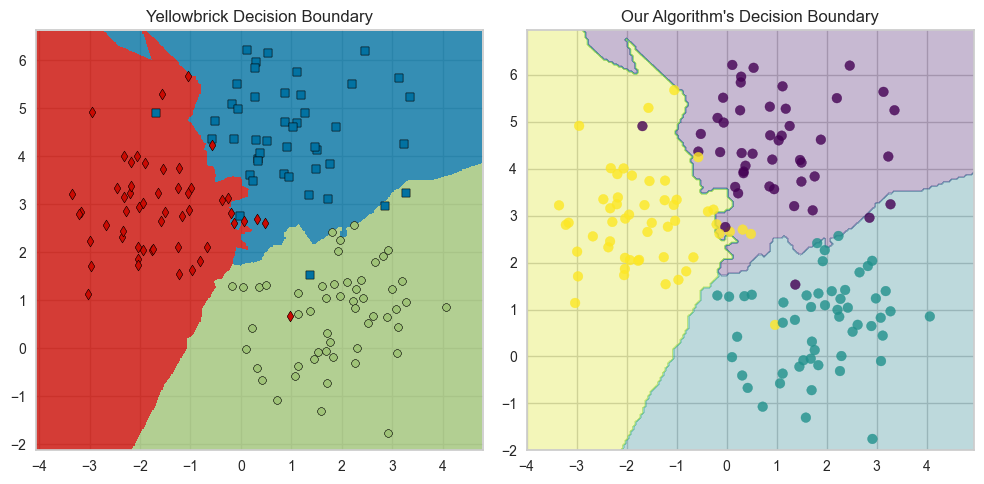

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating a figure with subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# First plot: Yellowbrick visualization
viz = DecisionViz(clf, ax=axes[0])  # Pass the axis where it will be drawn
viz.fit(X_train, y_train)            # Fit with the training data
viz.draw(X_test, y_test)             # Draw using the test data
axes[0].set_title("Yellowbrick Decision Boundary")

# Second plot: our algorithm's implementation
axes[1].contourf(xx, yy, Z, cmap=cmap, alpha=0.3)  # Fill the contours

# Preparing data for scatter plot
df2 = pd.DataFrame(X_test)
df2['color'] = y_test

# Scatter plot with the test data
scatter = axes[1].scatter(df2[0], df2[1], c=df2['color'], cmap=cmap, alpha=0.8)
axes[1].set_title("Our Algorithm's Decision Boundary")

# Adjust spacing to avoid overlap of titles and labels
plt.tight_layout()

# Display the figure with both plots side by side
plt.show()

